# Энергия ферромагнетика 2D (2023)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы.

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым).
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.

Средняя энергия системы
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом:
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$






## **Решение**

In [85]:
import numpy as np
import itertools # Библиотека для апгрейда итерации
import matplotlib.pyplot as plt

from timeit import timeit
from numba import njit, prange
from tqdm import trange

In [2]:
Ly = 4 # Высота решетки
Lx_array = np.arange(2, 9).astype(int) # Массив ширины решетки (потом решила для trange просто не использовать это, =)   )
kT = np.arange(1, 5, 0.1)

# Межмолекулярное взаимодействие в нашем случае описывается константами Jij = 1.
# Поэтому буду использовать одну константу J = 1
J = 1

In [119]:
def energy_at_zero_magnetic_field(sigma_arr:np.ndarray, Lx:int): # Но эта функция не работатет с нумба, тк используются срезы
    """
    Функция подсчитывает энергию системы при нулевом внешнем магнитном поле.
    Она равна сумме произведений соседних спинов на константы взаимодействия Jij.

    Параметры:
    sigma_arr : ndarray;       двумерный массив значений всех спинов в узнал решетки
    Lx: int;                   ширина решетки

    Возвращаемое значение:
    sum :  float;              энергия двумерной решетки при нулевом магнитном поле
    """
    sigma_arr = np.array(sigma_arr).reshape(Lx,Ly) # Изначально product создает вектора длины Lx*Ly. Я хочу работать с ними как с двумерным массивом

    shift_y = sigma_arr.copy() # будем брать соседние элементы так: сначала создаю "сдвинутую матрицу" по оси х и по оси y. А затем суммирую элементы, стоящие на тех местах, где стоит изначальный элемент
    shift_y[:-1] = sigma_arr[1:] # сдвиг по оси y
    shift_y[-1] = sigma_arr[0]

    shift_x = sigma_arr.copy() # сдвиг по оси x
    shift_x[:,:-1] = sigma_arr[:,1:]
    shift_x[:,-1] = sigma_arr[:,0]

    return -np.sum(J*sigma_arr*(shift_y + shift_x)) # Домножаю на J просто для наглядности.
                                                     # Но здесь и далее J=1

In [120]:
def mean_energy_func(Lx:int):
    """
    Функция вычисляет среднюю энергию системы по формуле:
    (сумма энергий системы при нулевой магнитном поле) * (экспоненциальный компонент) / (статистическая сумма)

    Параметры:
    Lx: float;               ширина решетки

    Возвращаемое значение:
    E_mean:  float;          cредняя энергия системы
    """

    Sum_E = 0 # Компонент суммы в формуле для вычисляния средней энерргии системы
    Z = 0     # Статистическая сумма
    N = Ly*Lx

    for sigma_mtrx_var in itertools.product([-1,1], repeat = N): # К сожалению, product не нравится нумбе. Это медленное решение
                                                # Проходимся по всем возможным конфигурациям
                                                # Всего имеется 2**N различных наборов спинов, где N - количество узлов решетки
                                                # Функция перебирает все возможные различные варианты составить матрицу
                                                # Из 2**(Ly*Lx) элементов, каждый из которых равен 1 или -1
      E_sigma = energy_at_zero_magnetic_field(sigma_mtrx_var, Lx)
      e_comp = np.exp(-E_sigma/kT)
      Z += e_comp
      Sum_E += e_comp*E_sigma

    return Sum_E/Z

In [124]:
def result_func(Lx_temp:int):
  """
  Функция рассчитывает массив средних энергий для текущего значения по оси абсцисс,
  а затем печатает его в поток вывода.

  Параметры:
  Lx_temp: float;      рассматриваемое значение ширины решетки

  Возвращаемое значение:
  E_res: array;        возвращает энергию
  """
  E_res = mean_energy_func(Lx_temp)
  np.save(f'Energy_Lx_{Lx_temp}', np.array(E_res/(Ly*Lx_temp))) # Записываем массив, нормированный относительно размера решетки

  # print(E_res/(Ly*Lx_temp))   # Строчка нужна была для теста
  return E_res

##Подсчет для Lx = 4

In [122]:
%%time
result_func(4)

[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]
CPU times: user 1.46 s, sys: 0 ns, total: 1.46 s
Wall time: 1.47 s


Для 4 **сошлось**, поэтому можно запустить для всех остальных

In [ ]:
%%time
result_func(5)

[-1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774]
CPU times: user 29.9 s, sys: 68.2 ms, total: 29.9 s
Wall time: 30.9 s


array([-39.94317857, -39.87925925, -39.77145267, -39.60367742,
       -39.35767264, -39.01279276, -38.54593836, -37.93222417,
       -37.14712781, -36.17062651, -34.99300486, -33.62075037,
       -32.07997556, -30.41511537, -28.68255262, -26.94126608,
       -25.2438617 , -23.63067213, -22.12777444, -20.74814941,
       -19.49452933, -18.36263996, -17.34405103, -16.42832902,
       -15.60448897, -14.86187673, -14.190643  , -13.58194984,
       -13.02801499, -12.52206646, -12.05825283, -11.63153727,
       -11.23759043, -10.87269039, -10.53363307, -10.21765418,
        -9.92236225,  -9.64568187,  -9.38580579,  -9.14115472])

In [126]:
for x in Lx_array[:-3]:    # Lx_array = [2,3,4,5,6,7,8]. Но я прохожусь для первых 4
  print('\nFor Lx = ', x, '\n')
  %time Energy = result_func(x)
  np.save(f'energy_when_Lx_{x}', np.array(Energy/(Ly*x))) # Сохраняю результат вычислений в файл
  print(Energy/(Ly*x))


For Lx =  2 

CPU times: user 10.5 ms, sys: 3.02 ms, total: 13.5 ms
Wall time: 13 ms
[-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
 -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
 -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
 -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
 -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
 -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
 -0.71399168 -0.69642337 -0.67970548 -0.66378023]

For Lx =  3 

CPU times: user 93 ms, sys: 1.99 ms, total: 95 ms
Wall time: 94.5 ms
[-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
 -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
 -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
 -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
 -0.88450084 -0.84416295 -0.80696158 -0.77263715 -0

Но такое решение слишком медленное, для 8 дожидаться слишком долго. Поэтому необходимо улучшить функцию, чтобы не пришлось ждать 7 часов....

In [127]:
Lx_2 = np.load("energy_when_Lx_2.npy")
Lx_3 = np.load("energy_when_Lx_3.npy")
Lx_4 = np.load("energy_when_Lx_4.npy")
Lx_5 = np.load("energy_when_Lx_5.npy")
Lx_6 = np.load("energy_when_Lx_6.npy") # когда я исправляла код на быстрый,
                                       # я случайно запустила код заново, время не сохранилось)))
                                       # поэтому тут я строила по уже посчитанным ранее файлам, но время будет выведено позже с уже быстрым алгоритмом
Lx_7 = np.load("energy_when_Lx_7.npy")
# Energy_Lx8=np.load("mean_Energy_Lx8.npy")

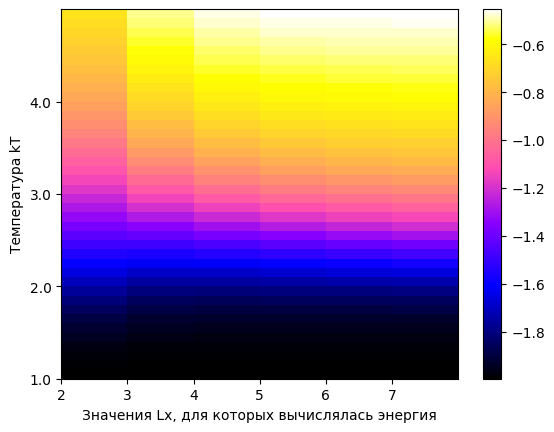

In [ ]:
energy_arr = np.array([Lx_2, Lx_3, Lx_4, Lx_5, Lx_6, Lx_7])
energy_arr = energy_arr.transpose()

figure, axes=plt.subplots()

Lx_temp = np.array([2,3,4,5,6,7])

tick_x=np.arange(0,Lx_temp.size)
axes.set_xticks(tick_x) # мы выбираем какие значения будут подписаны на графике
axes.set_xticklabels(Lx_temp) # подписаваем выбранные значения

tick_y=np.arange(0,kT.size,10)
axes.set_yticks(tick_y) # мы выбираем какие значения будут подписаны на графике по оси ординат
axes.set_yticklabels(np.round(kT[::10],1))# подписаваем выбранными значениями с шагом 10

axes.set_xlabel('Значения Lx, для которых вычислялась энергия') # устанавливаем название оси абцисс как 'Lx'
axes.set_ylabel('Температура kT') # устанавливаем название оси ординат как 'Kt'


plt.pcolormesh(energy_arr,cmap='gnuplot2')# отобразить цветовую карту
plt.colorbar();

# **Функция за 12 часов вычислений не подсчитала для 8. По моим расчетам, раз для Lx = 7 оно считало 2 часа, а для Lx = 8 необходимо посчитать в 16 раз больше..... В общем, результатов вычислений таким способом я не дождусь**

Для решения вторым способом необходимо вернуться к одномерному случаю. Если записать двумерную матрицу в строку, то нам не понадобится использовать product для перебора матриц, благодаря чему получится использовать njit (numba не воспринимает product)

Мы будем пересчитывать массив сигм не проверкой координат слева-справа-сверхку и снизу, а лишь проверять элементы справа и слева от текущего (как на семинаре)

In [128]:
@njit
def product_FAST(it, N) -> np.ndarray:
    """
    Функция, для создания массива сигм. до этого использовался product. Теперь вместо product
    Будет эта функция, которая будет возращать одномерный массив сигм

    Параметры:
    it : int;          целое число, по которому будет строиться вектор сигм
    N : int;           количество элементов в векторе = (Lx*Ly)

    Возвращаемое значение:
    sigma_vec: array;  вектор из сигм (-1 и 1), который уже потом преобразуем в матрицу
    """
    sigma_vec = np.empty(N, dtype=np.int8)
    for i in range(N):
        sigma_vec[i] = (it & 1) * 2 - 1 # Мы представляем номер итерации в двоичной системе счисления (из 0 и 1)
                                        # Когда умножим на 2 (0 или 1), получим либо 0, либо 2
                                        # Поэтому когда вычтем 1, получим либо 1, либо -1 (что нам и нужно)
                                        # а представление разных чисел от 0 до Lx*Ly в двоичной системе счисления различно
                                        # то есть мы переберем все различные значения
        it = it >> 1 # побитовый сдвиг, проходим по каждой цифре двоичного представления числа
    return sigma_vec

In [129]:
@njit
def energy_at_zero_magnetic_field_FAST(sigma_arr:np.ndarray, Lx:int):
    """
    Функция подсчитывает энергию системы при нулевом внешнем магнитном поле.
    Она равна сумме произведений соседних спинов на константы взаимодействия Jij.

    Параметры:
    sigma_arr : ndarray;       двумерный массив значений всех спинов в узнал решетки
    Lx: int;                   ширина решетки

    Возвращаемое значение:
    sum :  float;              энергия двумерной решетки при нулевом магнитном поле
    """

    # Пришлось эту функцию тоже изменить, так как опытным путем пришла к тому,
    # что нумба не умеет работать со срезами (?)
    E = 0
    for i in range(-1, len(sigma_arr) - 1):
        for j in range(-1, len(sigma_arr[0]) - 1):
            E -= J*sigma_arr[i][j] * (sigma_arr[i + 1][j] + sigma_arr[i][j + 1])
    return E

In [136]:
@njit(parallel=True)
def mean_energy_FAST(Lx:int):
    """
    Функция вычисляет среднюю энергию системы по формуле:
    (сумма энергий системы при нулевой магнитном поле) * (экспоненциальный компонент) / (статистическая сумма)

    Параметры:
    Lx: float;               ширина решетки

    Возвращаемое значение:
    E_mean:  float;          cредняя энергия системы
    """

    # Ранее я очень сильно отдавала все на откуп нумпая, и он преобразовывал kT в то, что мне нужно
    # Но для нумбы нужно конкретно объяснить тип переменных
    Sum_E_new = np.zeros(len(kT)) # Компонент суммы в формуле для вычисляния средней энерргии системы
    Z_new = np.zeros(len(kT))     # Статистическая сумма
    N = Ly*Lx

    for it in prange(2**(N)): # Проходим по всем числам от 0 до 2**(N). В двоичной системе счисления они будут иметь разное представление
      sigma_vec = product_FAST(it, N) # Здесь мы вызываем нашу новую быструю функцию
      sigma_mtrx_var = sigma_vec.reshape(Ly, Lx) # преобразуем вектор, возвращаемый product_NEW в матрицу

      E_sigma = energy_at_zero_magnetic_field_FAST(sigma_mtrx_var, Lx)
      e_comp = np.exp(-E_sigma/kT)
      Z_new += e_comp
      Sum_E_new += e_comp*E_sigma

    return Sum_E_new/Z_new

In [137]:
def result_FAST(Lx_temp) -> np.ndarray:
  """
  Функция рассчитывает массив средних энергий для текущего значения по оси абсцисс,
  а затем печатает его в поток вывода.

  Параметры:
  Lx_temp: float;      рассматриваемое значение ширины решетки

  Возвращаемое значение:
  E_res: array;        возвращает энергию
  """
  E_res = mean_energy_FAST(Lx_temp)
  np.save(f'Energy_Lx_{Lx_temp}', np.array(E_res/(Ly*Lx_temp))) # Записываем массив, нормированный относительно размера решетки

  # print(E_res/(Ly*Lx_temp))   # Строчка нужна была для теста
  return E_res

In [138]:
for x in Lx_array:    # Lx_array = [2,3,4,5,6,7,8]. Но я прохожусь для первых 4
  print('\nFor Lx = ', x, '\n')
  %time Energy = result_FAST(x)
  np.save(f'energy_when_Lx_{x}', np.array(Energy/(Ly*x))) # Сохраняю результат вычислений в файл
  print(Energy/(Ly*x))


For Lx =  2 

CPU times: user 3.55 s, sys: 17.7 ms, total: 3.57 s
Wall time: 3.58 s
[-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
 -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
 -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
 -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
 -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
 -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
 -0.71399168 -0.69642337 -0.67970548 -0.66378023]

For Lx =  3 

CPU times: user 4.29 ms, sys: 2.02 ms, total: 6.31 ms
Wall time: 4.77 ms
[-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
 -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
 -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
 -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
 -0.88450084 -0.84416295 -0.80696158 -0.77263715

In [139]:
Lx_2 = np.load("energy_when_Lx_2.npy")
Lx_3 = np.load("energy_when_Lx_3.npy")
Lx_4 = np.load("energy_when_Lx_4.npy")
Lx_5 = np.load("energy_when_Lx_5.npy")
Lx_6 = np.load("energy_when_Lx_6.npy")
Lx_7 = np.load("energy_when_Lx_7.npy")
Lx_8 = np.load("energy_when_Lx_8.npy")

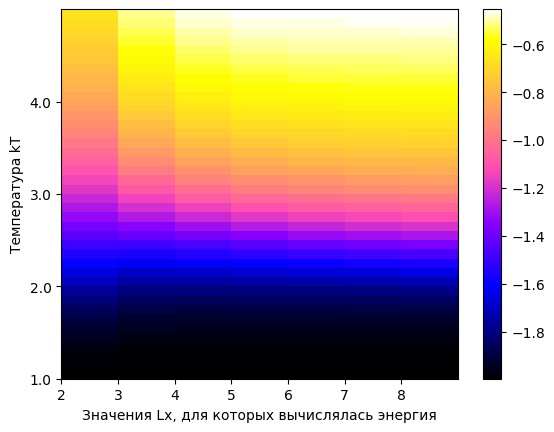

In [140]:
energy_arr = np.array([Lx_2, Lx_3, Lx_4, Lx_5, Lx_6, Lx_7, Lx_8])
energy_arr = energy_arr.transpose()

figure, axes=plt.subplots()

Lx_temp = np.array([2,3,4,5,6,7,8])

tick_x=np.arange(0,Lx_temp.size)
axes.set_xticks(tick_x) # мы выбираем какие значения будут подписаны на графике
axes.set_xticklabels(Lx_temp) # подписаваем выбранные значения

tick_y=np.arange(0,kT.size,10)
axes.set_yticks(tick_y) # мы выбираем какие значения будут подписаны на графике по оси ординат
axes.set_yticklabels(np.round(kT[::10],1))# подписаваем выбранными значениями с шагом 10

axes.set_xlabel('Значения Lx, для которых вычислялась энергия') # устанавливаем название оси абцисс как 'Lx'
axes.set_ylabel('Температура kT') # устанавливаем название оси ординат как 'Kt'


plt.pcolormesh(energy_arr,cmap='gnuplot2')# отобразить цветовую карту
plt.colorbar();